In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
import pandas
import numpy
import os

import plotly.io as pio
pio.renderers.default='notebook'

from plotting import plot_timeline, find_runs, configure_xaxis
from plotting import make_label_colors, make_timeline_plot


#import seaborn
#from matplotlib import pyplot as plt

In [4]:
data_path = '../examples/har_trees/data/processed/pamap2.parquet'
data = pandas.read_parquet(data_path)
data

activity  heartrate  hand_temperature  \
subject    time                                                             
subject101 0 days 00:00:08.380000  transient      104.0           30.0000   
           0 days 00:00:08.390000  transient        NaN           30.0000   
           0 days 00:00:08.400000  transient        NaN           30.0000   
           0 days 00:00:08.410000  transient        NaN           30.0000   
           0 days 00:00:08.420000  transient        NaN           30.0000   
...                                      ...        ...               ...   
subject107 0 days 00:52:21.860000    running        NaN           32.4375   
           0 days 00:52:21.870000    running        NaN           32.4375   
           0 days 00:52:21.880000    running        NaN           32.4375   
           0 days 00:52:21.890000    running        NaN           32.4375   
           0 days 00:52:21.900000    running        NaN           32.4375   

                                   hand_acceleration_16g_x  \
subject    time                                              
subject101 0 days 00:00:08.380000                 2.372230   
           0 days 00:00:08.390000                 2.188370   
           0 days 00:00:08.400000                 2.373570   
           0 days 00:00:08.410000                 2.074730   
           0 days 00:00:08.420000                 2.229360   
...                                                    ...   
subject107 0 days 00:52:21.860000               -16.898100   
           0 days 00:52:21.870000               -10.764300   
           0 days 00:52:21.880000                -5.815250   
           0 days 00:52:21.890000                -2.326410   
           0 days 00:52:21.900000                -0.584429   

                                   hand_acceleration_16g_y  \
subject    time                                              
subject101 0 days 00:00:08.380000                  8.60074   
           0 days 00:00:08.390000                  8.56560   
           0 days 00:00:08.400000                  8.60107   
           0 days 00:00:08.410000                  8.52853   
           0 days 00:00:08.420000                  8.83122   
...                                                    ...   
subject107 0 days 00:52:21.860000                 36.83070   
           0 days 00:52:21.870000                 35.74550   
           0 days 00:52:21.880000                 32.72480   
           0 days 00:52:21.890000                 28.67670   
           0 days 00:52:21.900000                 23.61750   

                                   hand_acceleration_16g_z  \
subject    time                                              
subject101 0 days 00:00:08.380000                  3.51048   
           0 days 00:00:08.390000                  3.66179   
           0 days 00:00:08.400000                  3.54898   
           0 days 00:00:08.410000                  3.66021   
           0 days 00:00:08.420000                  3.70000   
...                                                    ...   
subject107 0 days 00:52:21.860000                 -9.03542   
           0 days 00:52:21.870000                 -6.20728   
           0 days 00:52:21.880000                 -4.46800   
           0 days 00:52:21.890000                 -4.32511   
           0 days 00:52:21.900000                 -4.24346   

                                   hand_acceleration_6g_x  \
subject    time                                             
subject101 0 days 00:00:08.380000                 2.43954   
           0 days 00:00:08.390000                 2.39494   
           0 days 00:00:08.400000                 2.30514   
           0 days 00:00:08.410000                 2.33528   
           0 days 00:00:08.420000                 2.23055   
...                                                   ...   
subject107 0 days 00:52:21.860000               -21.08210   
           0 days 00:52:21.870000               -16.12180   
   

In [5]:
data.columns

Index(['activity', 'heartrate', 'hand_temperature', 'hand_acceleration_16g_x',
       'hand_acceleration_16g_y', 'hand_acceleration_16g_z',
       'hand_acceleration_6g_x', 'hand_acceleration_6g_y',
       'hand_acceleration_6g_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
       'hand_magnetometer_x', 'hand_magnetometer_y', 'hand_magnetometer_z',
       'chest_hand_temperature', 'chest_hand_acceleration_16g_x',
       'chest_hand_acceleration_16g_y', 'chest_hand_acceleration_16g_z',
       'chest_hand_acceleration_6g_x', 'chest_hand_acceleration_6g_y',
       'chest_hand_acceleration_6g_z', 'chest_hand_gyro_x',
       'chest_hand_gyro_y', 'chest_hand_gyro_z', 'chest_hand_magnetometer_x',
       'chest_hand_magnetometer_y', 'chest_hand_magnetometer_z',
       'ankle_chest_hand_temperature', 'ankle_chest_hand_acceleration_16g_x',
       'ankle_chest_hand_acceleration_16g_y',
       'ankle_chest_hand_acceleration_16g_z',
       'ankle_chest_hand_acceleration_6g_x',
       'ankle_chest

In [6]:
one = data.loc['subject102']

sensor_columns = [
    'hand_acceleration_6g_x',
    'hand_acceleration_6g_y',
    'hand_acceleration_6g_z',
]

labeled_events = find_runs(one.activity)
labeled_events

/home/jon/projects/emlearn-micropython/paper/plotting.py:27: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.



label             start_time               end_time
0           transient 0 days 00:00:05.640000 0 days 00:00:55.190000
1               lying 0 days 00:00:55.200000 0 days 00:04:49.490000
2           transient 0 days 00:04:49.500000 0 days 00:05:52.150000
3             sitting 0 days 00:05:52.160000 0 days 00:09:35.600000
4           transient 0 days 00:09:35.610000 0 days 00:09:55.870000
5            standing 0 days 00:09:55.880000 0 days 00:14:11.630000
6           transient 0 days 00:14:11.640000 0 days 00:15:08.070000
7             ironing 0 days 00:15:08.080000 0 days 00:19:56.870000
8           transient 0 days 00:19:56.880000 0 days 00:21:17.770000
9     vacuum_cleaning 0 days 00:21:17.780000 0 days 00:24:44.600000
10          transient 0 days 00:24:44.610000 0 days 00:28:54.160000
11   ascending_stairs 0 days 00:28:54.170000 0 days 00:30:21.410000
12          transient 0 days 00:30:21.420000 0 days 00:32:01.240000
13  descending_stairs 0 days 00:32:01.250000 0 days 00:33:19.150000
14          transient 0 days 00:33:19.160000 0 days 00:40:29.100000
15   ascending_stairs 0 days 00:40:29.110000 0 days 00:41:55.270000
16  descending_stairs 0 days 00:41:55.280000 0 days 00:43:09.490000
17          transient 0 days 00:43:09.500000 0 days 00:46:20.710000
18            walking 0 days 00:46:20.720000 0 days 00:51:46.040000
19          transient 0 days 00:51:46.050000 0 days 00:53:49.690000
20     Nordic_walking 0 days 00:53:49.700000 0 days 00:58:47.080000
21          transient 0 days 00:58:47.090000 0 days 00:59:47.880000
22            cycling 0 days 00:59:47.890000 0 days 01:03:58.960000
23          transient 0 days 01:03:58.970000 0 days 01:05:15.430000
24            running 0 days 01:05:15.440000 0 days 01:06:47.810000
25          transient 0 days 01:06:47.820000 0 days 01:08:33.060000
26       rope_jumping 0 days 01:08:33.070000 0 days 01:10:45.680000
27          transient 0 days 01:10:45.690000 0 days 01:14:35.630000

In [67]:

import emlearn

from processing import process_data, make_label_track, convert_to_raw

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

def train_and_run(data : pandas.DataFrame, label_column='activity'):
    
    events = find_runs(data[label_column])
    sensor_data = convert_to_raw(data[sensor_columns])
    features = process_data(sensor_data)
    
    q = features.quantile([0.01, 0.50, 0.99])
    #print(q)
    
    labels = make_label_track(features.index, events)
    combined = pandas.merge(features, sensor_data, left_index=True, right_index=True)
    combined['activity'] = labels

    
    estimator = RandomForestClassifier(n_estimators=10, min_samples_leaf=10)

    feature_columns = features.columns
    X = combined[feature_columns]
    Y = combined[label_column]

    # run cross-validation for basic indicator of fit
    res = cross_validate(estimator, X=X, y=Y, scoring='f1_macro', return_estimator=True)
    print(res['test_score'])

    # retrain on entire dataset. XXX: this is data leakage.
    # Not acceptable in real model, but here we are just looking to illustrate
    estimator.fit(X, Y)

    # Convert model with emlearn
    model_path = 'model.csv'
    converted = emlearn.convert(estimator)
    converted.save(file=model_path, format='csv')
    print('Exported', model_path)

    from sklearn.metrics import f1_score
    def f1_macro(y_true, y_pred):
        return f1_score(y_true, y_pred, average='macro')
    class_names = estimator.classes_
    ref_preds = pandas.DataFrame(estimator.predict_proba(X), index=X.index, columns=estimator.classes_)
    ref_score = f1_macro(Y, class_names[numpy.argmax(ref_preds, axis=1)])

    #print(estimator.feature_names_in_)
    
    # Run model predictions with emlearn
    out = process_data(sensor_data, model_path=model_path, classes=list(estimator.classes_))
    preds = out[estimator.classes_]
    c_score = f1_macro(Y, class_names[numpy.argmax(preds, axis=1)])
    #print(preds.head())

    print('test scores', ref_score, c_score)
    
    rolling_window = 5
    smooth = preds[class_columns].rolling(rolling_window).median()
    smooth['activity'] =  make_label_track(smooth.index, events)

    return combined, smooth, estimator

class_columns = ['Nordic_walking', 'cycling', 'walking', 
                 #'rope_jumping',
                 #'running',
                 'transient'
                ]
sub = one.loc[pandas.Timedelta(minutes=48):pandas.Timedelta(minutes=63)]
combined, smooth, estimator = train_and_run(sub)
smooth.head()

/home/jon/projects/emlearn-micropython/paper/plotting.py:27: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.



missing values 0.0033332962967078145 %
0 days 00:00:02.560000
run-cmd micropython /home/jon/projects/emlearn-micropython/paper/example.py input.npy output.npy
[0.67233639 0.71646764 0.6204899  0.69873676 0.5107016 ]
Exported model.csv
0 days 00:00:02.560000
run-cmd micropython /home/jon/projects/emlearn-micropython/paper/example.py input.npy output.npy model.csv
test scores 0.7964886561273107 0.756707790245025


Nordic_walking  cycling  walking  transient activity
time                                                                        
0 days 00:48:00                    NaN      NaN      NaN        NaN  walking
0 days 00:48:02.560000             NaN      NaN      NaN        NaN  walking
0 days 00:48:05.120000             NaN      NaN      NaN        NaN  walking
0 days 00:48:07.680000             NaN      NaN      NaN        NaN  walking
0 days 00:48:10.240000             0.0      0.0      0.9        0.0  walking

<Axes: xlabel='importance', ylabel='feature'>

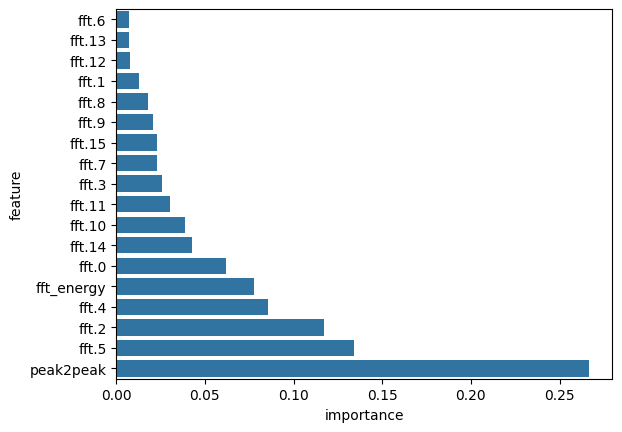

In [68]:
feature_importance = pandas.Series(estimator.feature_importances_, index=estimator.feature_names_in_, name='importance').to_frame()
feature_importance.index.name = 'feature'

import seaborn
seaborn.barplot(data=feature_importance.reset_index().sort_values('importance'), x='importance', y='feature')

In [69]:


colors ={
    'Nordic_walking': 'rgb(251,128,114)',
    'cycling': 'rgb(179,222,105)',
    'walking': 'rgb(253,180,98)',
    'transient': 'rgb(217,217,217)',
    'running': 'rgb(255,237,111)',
    'rope_jumping': '#2E91E5',
    'lying': 'rgb(255,255,179)',
    'sitting': 'rgb(190,186,218)',
    'standing': 'rgb(251,128,114)',
    'ironing': 'rgb(128,177,211)',
    'vacuum_cleaning': 'rgb(253,180,98)',
    'ascending_stairs': 'rgb(179,222,105)',
    'descending_stairs': 'rgb(252,205,229)',
}

width = 1600
aspect = 2.0
height = width/aspect
fig = make_timeline_plot(sub, combined, smooth, colors, class_names=class_columns, width=width, aspect=aspect)

plot_path = 'physical_activity_recognition_pipeline.png'
fig.write_image(plot_path, scale=1.5, width=width, height=height)
fig

add-events {'col': 1, 'row': 1} y
        peak2peak    fft_energy
count  351.000000  3.510000e+02
mean     0.356169  5.880848e-01
std      0.340400  5.002171e-01
min      0.003904 -7.625756e-08
25%      0.144560  3.689122e-01
50%      0.223043  4.718358e-01
75%      0.487939  7.283085e-01
max      2.440344  6.391219e+00
[0.  0.4 0.8 1.2 1.6 2.  2.3 2.7 3.1 3.5 3.9 4.3 4.7 5.1 5.5 5.9]


/home/jon/projects/emlearn-micropython/paper/plotting.py:27: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.

/home/jon/projects/emlearn-micropython/paper/plotting.py:27: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.



add-events {'col': 1, 'row': 4} y4
